In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [22]:
ROOT_PATH = Path(".").resolve().parents[0]
print(ROOT_PATH)

train_df = pd.read_csv(ROOT_PATH / "input" / "train.csv")
display(train_df.head(5))

/Users/berry/Kaggle/bengali


,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


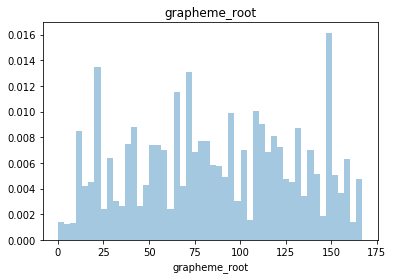

number of kinds:  168


In [4]:
sns.distplot(train_df["grapheme_root"], kde=False, norm_hist=True)
plt.title("grapheme_root")
plt.show()
print("number of kinds: ", len(train_df["grapheme_root"].value_counts().keys()))

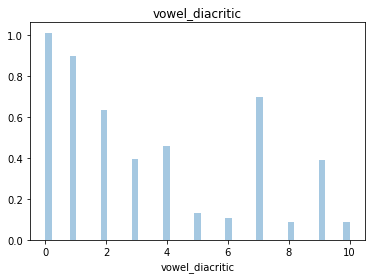

number of kinds:  11


In [5]:
sns.distplot(train_df["vowel_diacritic"], kde=False, norm_hist=True)
plt.title("vowel_diacritic")
plt.show()
print("number of kinds: ", len(train_df["vowel_diacritic"].value_counts().keys()))

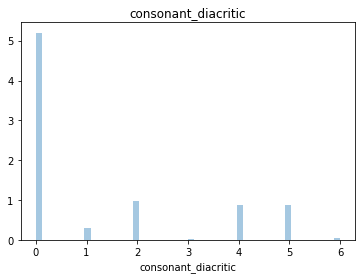

number of kinds:  7


In [6]:
sns.distplot(train_df["consonant_diacritic"], kde=False, norm_hist=True)
plt.title("consonant_diacritic")
plt.show()
print("number of kinds: ", len(train_df["consonant_diacritic"].value_counts().keys()))

## Combination

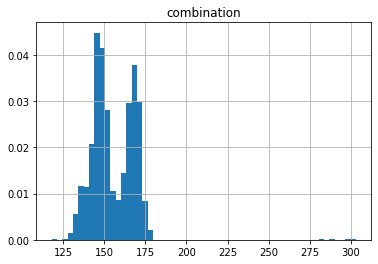

In [7]:
res = train_df.assign(count=0).groupby(["grapheme_root", "vowel_diacritic", "consonant_diacritic"])["count"].count().reset_index()
res["count"].hist(bins=len(res["count"].value_counts().keys()), normed=True)
plt.title("combination")
plt.show()

In [30]:
def make_validation(ratio=0.2):
    train_df["validation"] = (train_df["grapheme_root"] + 1) * 100000 + (train_df["vowel_diacritic"] + 1) * 1000 + train_df["consonant_diacritic"]
    train, valid = train_test_split(train_df, test_size=ratio, random_state=1116, stratify=train_df["validation"])
    out_train = train.set_index("image_id")
    out_valid = valid.set_index("image_id")
    del out_train["validation"], out_valid["validation"] 
    out_train.to_csv(ROOT_PATH / "input" / "moco_train_{}.csv".format(int(ratio * 100)))
    out_valid.to_csv(ROOT_PATH / "input" / "moco_valid_{}.csv".format(int(ratio * 100)))

In [31]:
make_validation(0.2)

In [32]:
make_validation(0.15)

In [33]:
make_validation(0.1)